In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("datasets_credit_labelled.csv")
data["Checking account"]=data["Checking account"].fillna("None")
data["Saving accounts"]=data["Saving accounts"].fillna("None")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,None,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,None,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# Analysis Distribution of Risk

## E.g. Age Group [18-25):Student, [25,35):Yonge, [35,60):Adult, [60, ): Senior]

## For Job: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

Use charts to visulize
1. Age Group to Risk 
2. Gender to Risk
3. Housing to Risk
4. Job to Risk
5. Saving Accounts to Risk
6. Credit Amount to Housing-boxplot
7. Job to Credit Amount
8. Age to Credit Amount
9. Any other things that revelent to analysis the relations between any of the columns
10. Correlation between them

In [4]:
data["Age_group"]=pd.cut(data["Age"], [18,25,35,60,100], labels=["Student","Yonge","Adult","Senior"])

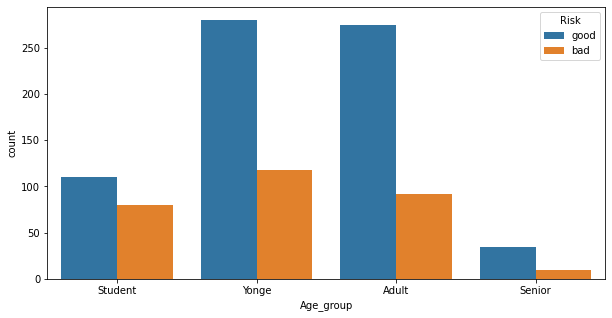

In [5]:
#1, Age Group to Risk
plt.figure(figsize=(10,5))
sns.countplot(x="Age_group", hue="Risk", data=data)
plt.show()

From the first bar chart, it can be inferred that the company should target on the group of "Yong" and "Adult". These two groups occupied the largest amount of customers. When compared with relatives between good and bad risk(the orange and blue bar), the"student" group is highly risky while the "Senior" one is more reliable.

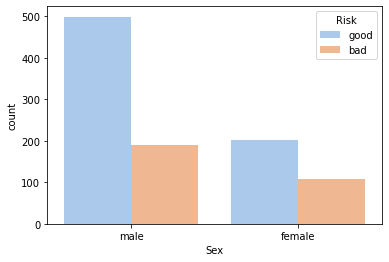

In [6]:
#2, Gender to Risk
sns.countplot(x="Sex", hue="Risk", data=data, palette="pastel")
plt.show()

As we can see from the bar chart, the major gender of their customer is male. And the man has more relative risk than women. For the male customer, the good risk amount in the male group is more than double the bad risk, while it is just double in the female group.

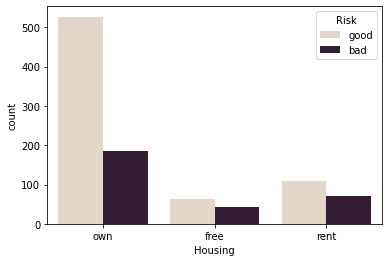

In [7]:
#3, Housing to Risk
sns.countplot(x="Housing", hue="Risk", data=data,palette="ch:.25")
plt.show()

From the overall bar in three groups, the group of own housing is the majority of our customers. Furthermore, this kind of person has a relatively good risk than other groups, when compared with the bad risk. On the opposite, the people who do not have any house are the riskiest among the three groups.

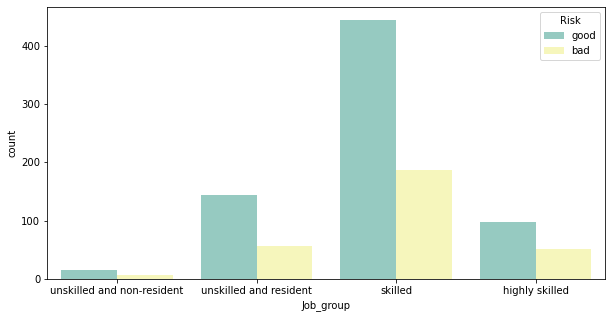

In [8]:
#4, Job to Risk
data["Job_group"]=pd.cut(data["Job"], [-1,0.5,1.5,2.5,3.5], labels=["unskilled and non-resident","unskilled and resident","skilled","highly skilled"])
plt.figure(figsize=(10,5))
sns.countplot(x="Job_group", hue="Risk", data=data, palette="Set3")
plt.show()

Based on the chart, the skilled group occupied the largest group of job. The risk of people in different job levels on good risks relatively higher than that on bad risk.

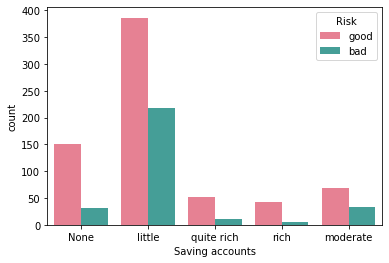

In [9]:
#5, Saving Accounts to Risk
sns.countplot(x="Saving accounts", hue="Risk", data=data, palette="husl")
plt.show()

From what we can see from the diagram, most borrowers have little or no money on saving accounts. But those quite rich and rich people are the safe group, whose good risk is higher relatively than bad risk.

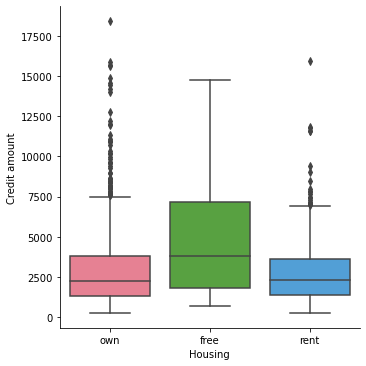

In [10]:
#6, Credit Amount to Housing
sns.catplot(x="Housing", y="Credit amount", kind="box", data=data, palette="husl")
plt.show()

 From this boxplot, these people who do not have a house to live in are more likely to borrow a high amount of money.  Other stable people (own a house or rent a house ) would be at a lower amount of credit.

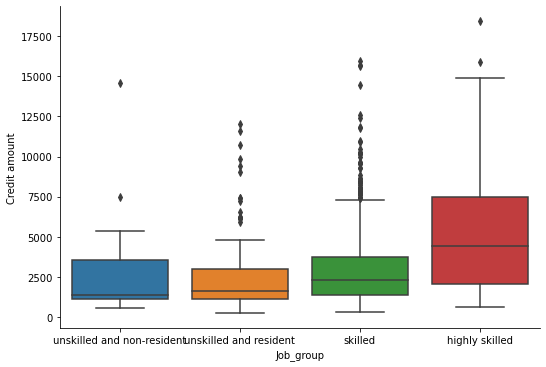

In [11]:
#7, Job to Credit Amount
sns.catplot(x="Job_group", y="Credit amount", kind="box", data=data, height=5, aspect=1.5)
plt.show()

As we can see clearly from the boxplot, High skilled people will borrow a higher amount of money to satisfied their needs.  For people who do not have skills, they would live at a lower live standard and borrow a lower credit amount. 

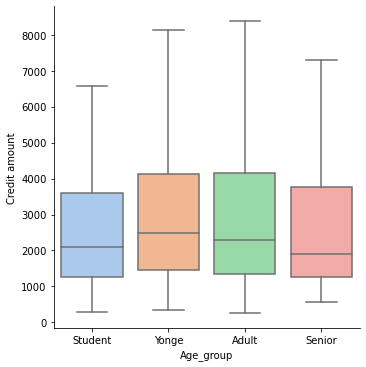

In [12]:
#8, Age to Credit Amount 
sns.catplot(x="Age_group", y="Credit amount", kind="box", data=data, showfliers = False, palette="pastel")
plt.show()

The group of younger and adult would borrow a higher amount than that of student and senior.  From these four groups, young people would borrow the highest amount of money, while the senior would borrow the lowest one.

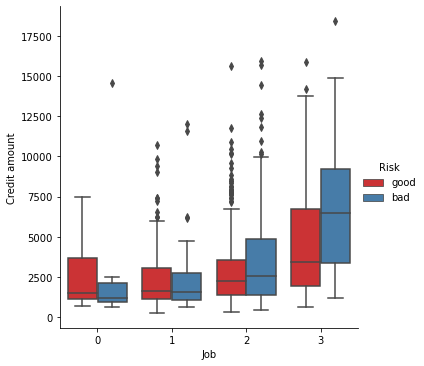

In [23]:
#9, Any other things that revelent to analysis the relations between any of the columns
#Job, Credit Amount to Risk
data["Checking account"]=data["Checking account"].fillna("none")
sns.catplot(x="Job", y="Credit amount", hue="Risk", kind="box", data=data, palette="Set1")
plt.show()

From the job type of 2 and 3, we can infer from the diagram that the high amount they borrow, the worse risk the debit would be. This principle would be the opposite of other groups. Moreover, a highly skilled group (job_type3) is highest on the credit amount.

In [18]:
#10, Dummy variable
data=data.merge(pd.get_dummies(data["Sex"], drop_first=True, prefix="Sex"),left_index=True, right_index=True)
data=data.merge(pd.get_dummies(data["Housing"], drop_first=True, prefix="Housing"),left_index=True, right_index=True)
data=data.merge(pd.get_dummies(data["Saving accounts"], drop_first=True, prefix="Saving accounts"),left_index=True, right_index=True)
data=data.merge(pd.get_dummies(data["Checking account"], drop_first=True, prefix="Checking account"),left_index=True, right_index=True)
data=data.merge(pd.get_dummies(data["Purpose"], drop_first=True, prefix="Purpose"),left_index=True, right_index=True)
data=data.merge(pd.get_dummies(data["Risk"], drop_first=True, prefix="Risk"),left_index=True, right_index=True)
# remove the categorical variable
data.drop(columns=["Sex", "Housing", "Saving accounts", "Checking account", "Purpose", "Risk","Job_group","Age_group"],inplace=True)

<AxesSubplot:>

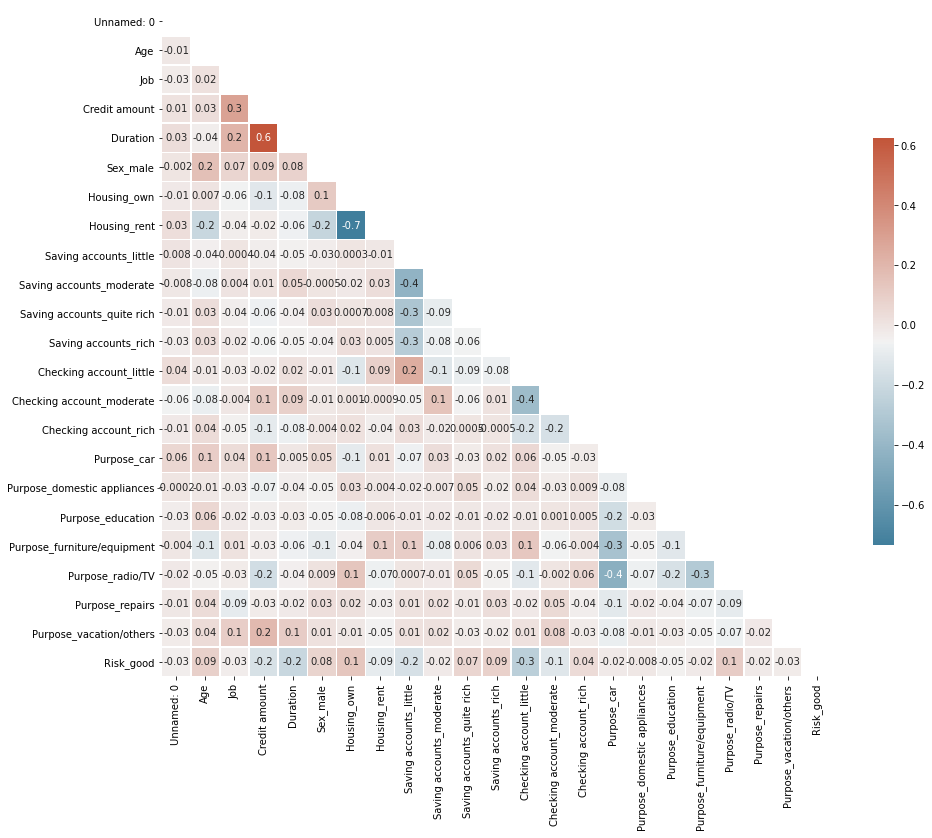

In [19]:
#correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.astype(float).corr(), mask=np.triu(data.astype(float).corr()), cmap = sns.diverging_palette(230, 20, as_cmap=True), annot=True, fmt='.1g', square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation heatmap, it can be seen that the duration has a strong positive relationship with the credit amount. The higher the credit amount, the longer the duration term. And the credit amount has a week positive relation with the job, which means that the more skilled people will borrow a higher amount of money. While for other negative relationships (-0.7,-0.4), these happen in the same category which is exclusive to others.